In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[]

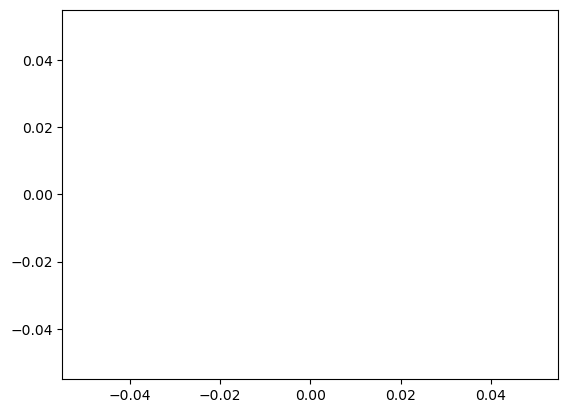

In [2]:
plt.plot()

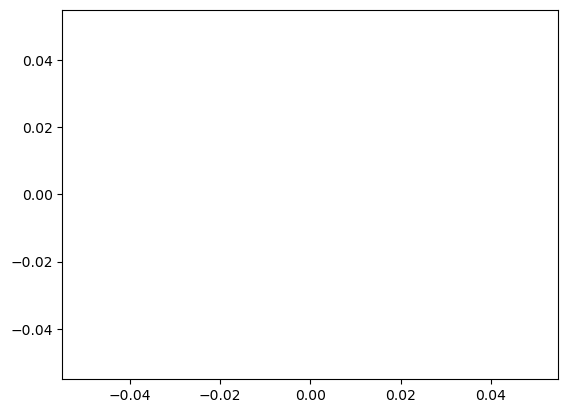

In [3]:
plt.plot()
plt.show()

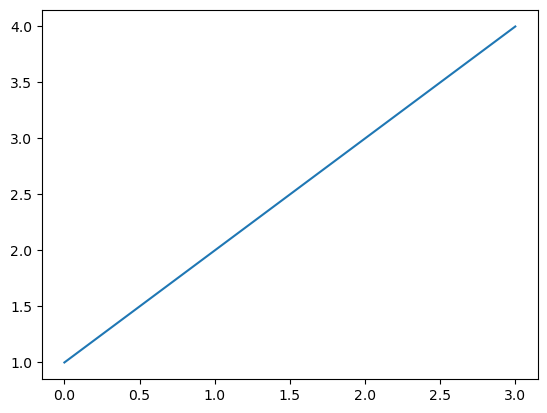

In [4]:
plt.plot([1,2,3,4]);

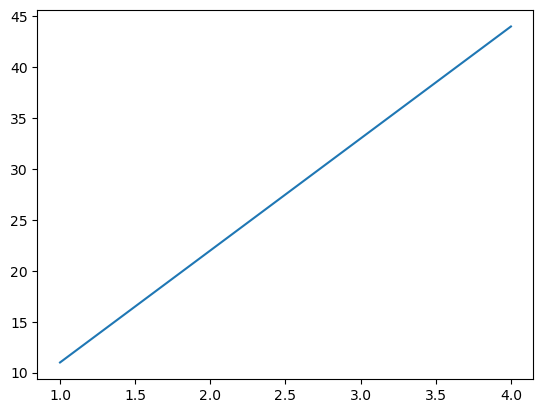

In [5]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

# 1st method

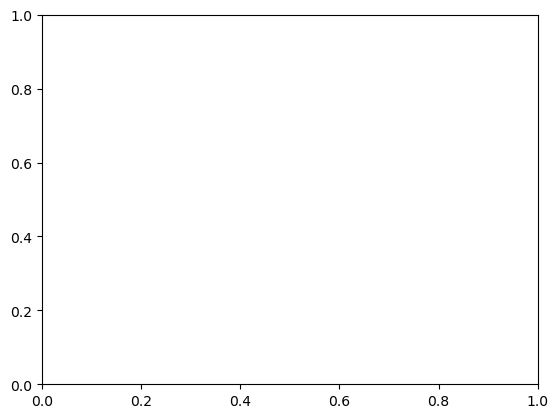

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

# 2nd method

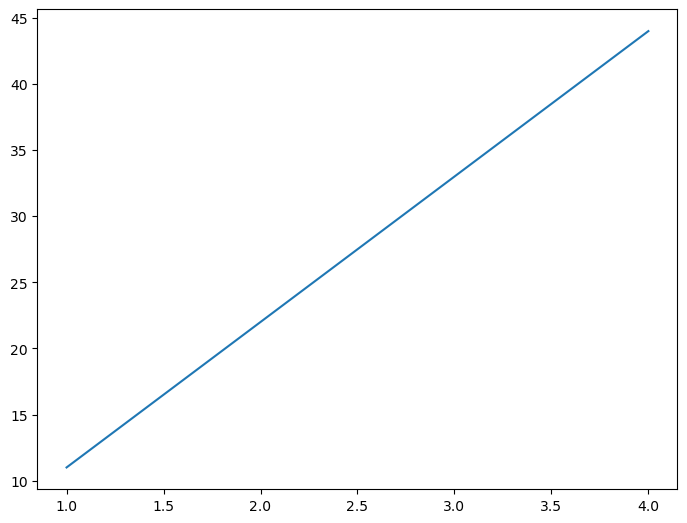

In [7]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

# 3rd method (recommended)

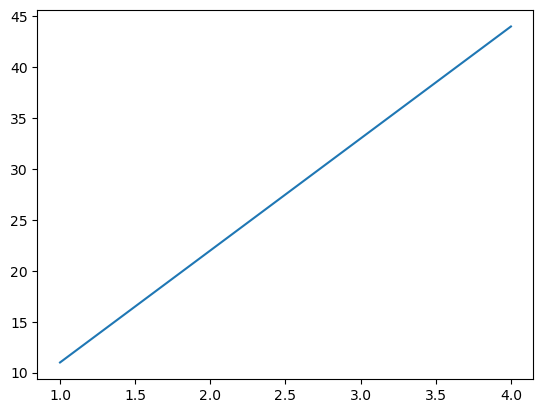

In [8]:
fig, ax = plt.subplots()
ax.plot(x,y)

<img src="images/matplotlib-anatomy-of-a-plot.png"/>

<img src="images/matplotlib-anatomy-of-a-plot-with-code.png"/>

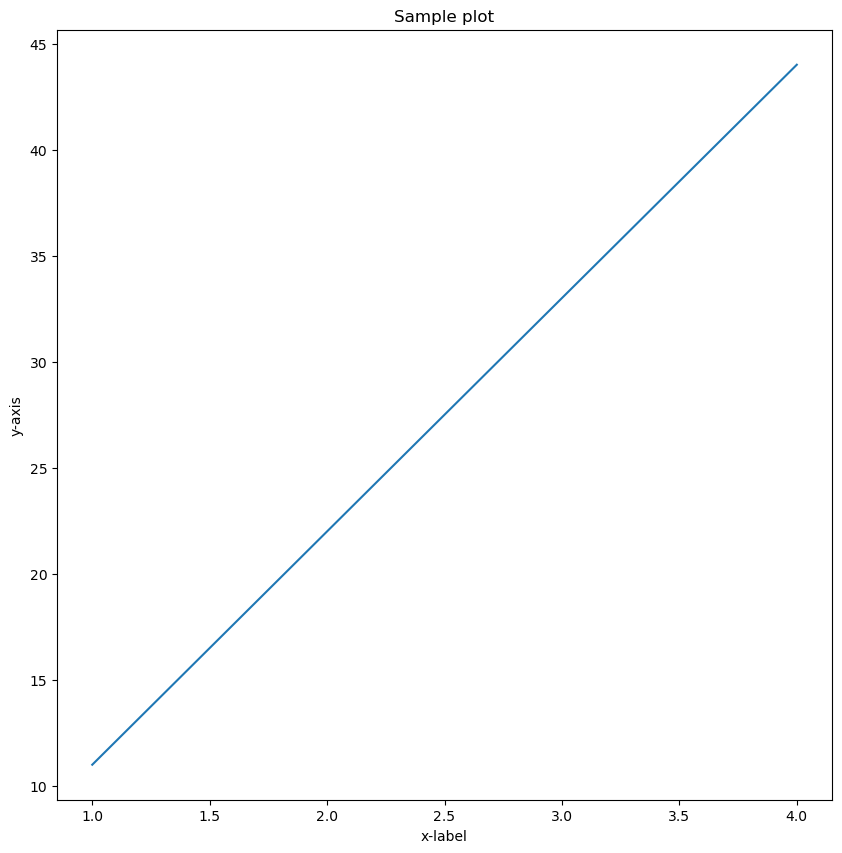

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample plot", xlabel="x-label", ylabel="y-axis")

# 5. Save and show
fig.savefig("images/sample-plot.png")


## Making figures with Numpy arrays

In [10]:
import numpy as np

In [11]:
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

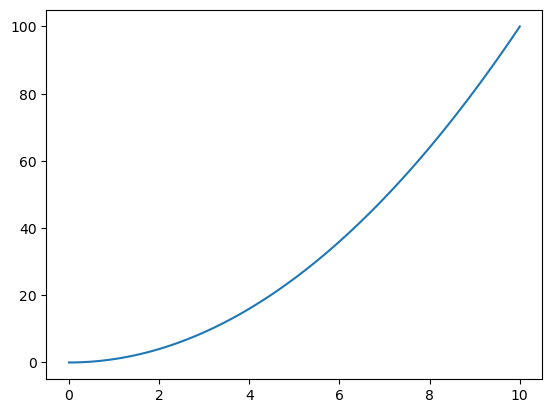

In [12]:
fig, ax = plt.subplots()
ax.plot(x, x**2)

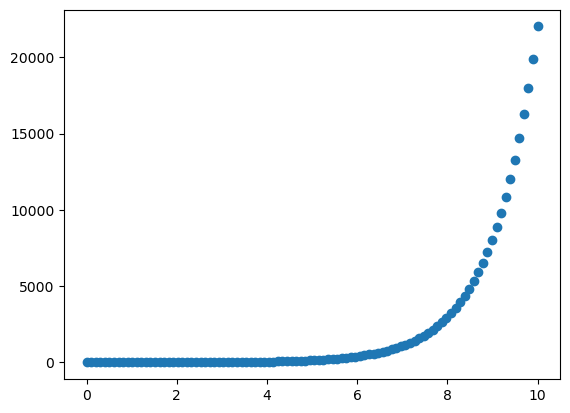

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

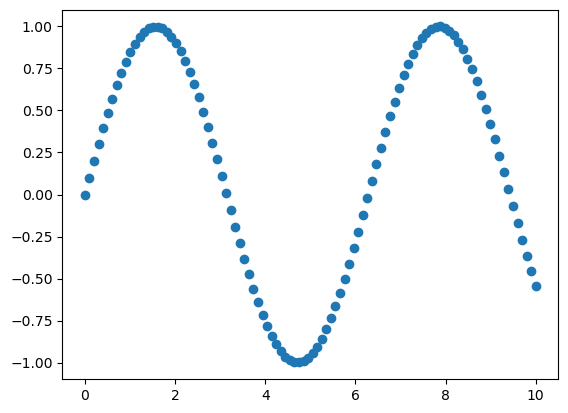

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

[Text(0.5, 1.0, 'Store'), Text(0, 0.5, 'Price ($)')]

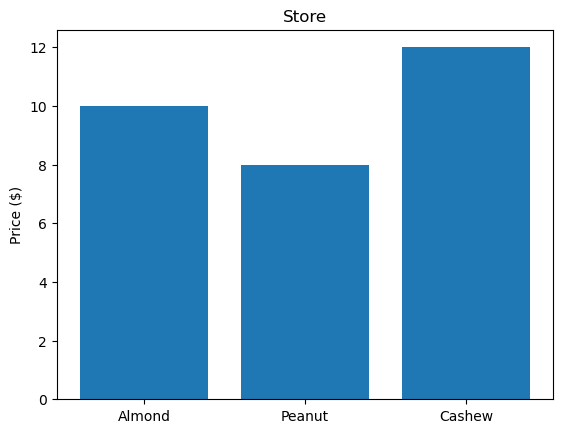

In [15]:
nut_butter_prices = {"Almond":10,"Peanut":8,"Cashew":12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Store", ylabel="Price ($)")

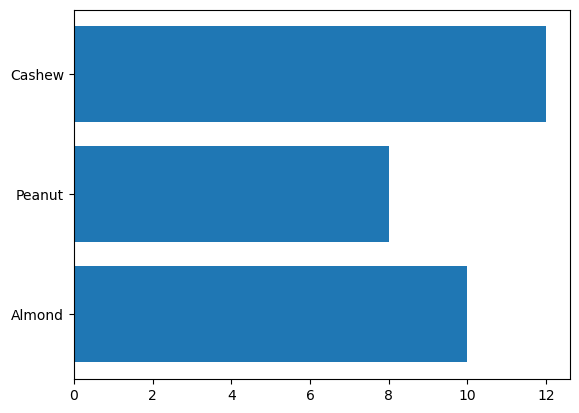

In [16]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

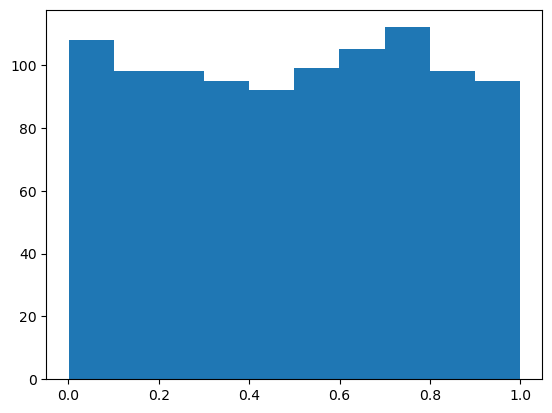

In [17]:
x = np.random.random(1000)
fig, ax = plt.subplots()
ax.hist(x);

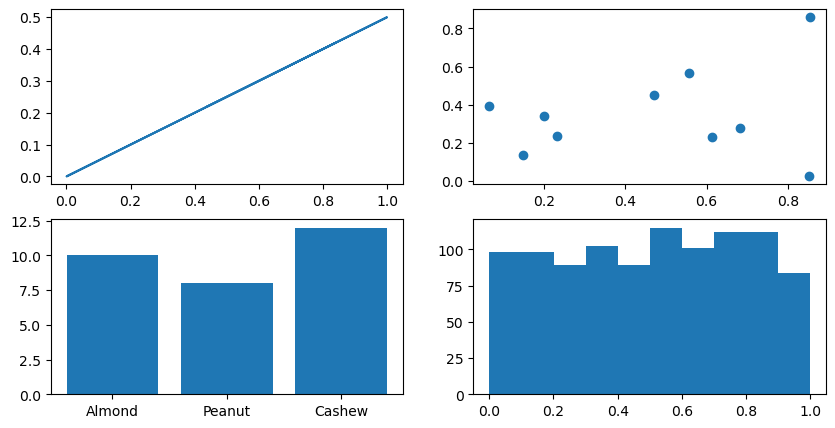

In [18]:
# subplots option 1
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.random(1000));

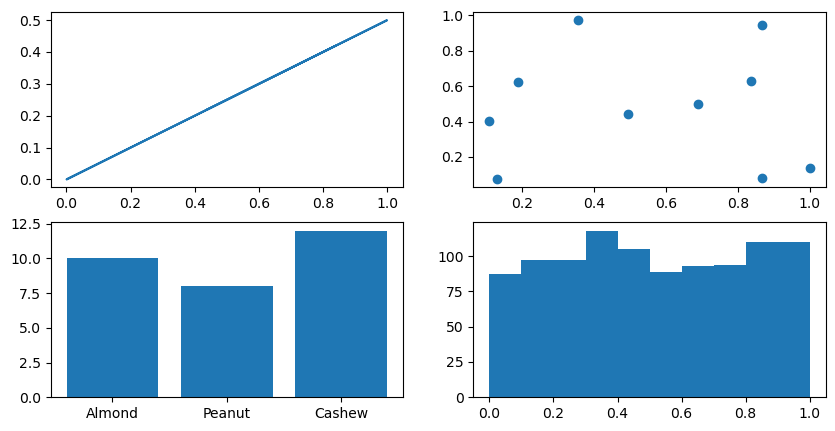

In [19]:
# subplots option 2
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.random(1000));

## Plotting from pandas DataFrames

<Axes: >

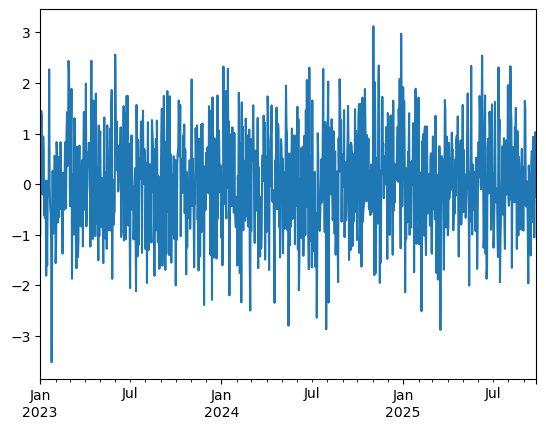

In [20]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2023", periods=1000))
ts.cumsum()
ts.plot()

In [21]:
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [22]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [23]:
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [24]:
car_sales["Sale Date"] = pd.date_range("1/1/2023", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02
2,Toyota,Blue,32549,3,7000,2023-01-03
3,BMW,Black,11179,5,22000,2023-01-04
4,Nissan,White,213095,4,3500,2023-01-05
5,Toyota,Green,99213,4,4500,2023-01-06
6,Honda,Blue,45698,4,7500,2023-01-07
7,Honda,Blue,54738,4,7000,2023-01-08
8,Toyota,White,60000,4,6250,2023-01-09
9,Nissan,White,31600,4,9700,2023-01-10


In [25]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


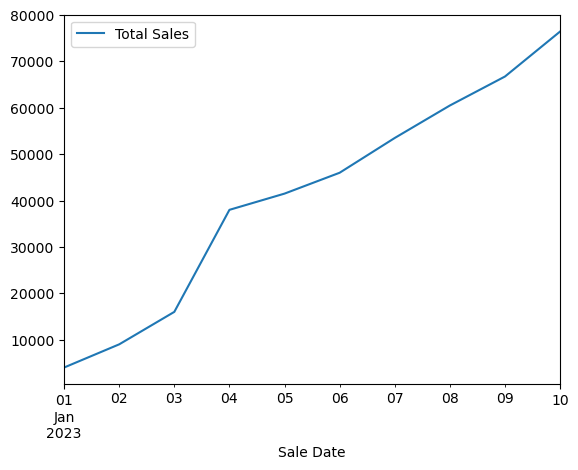

In [26]:
car_sales.plot(x="Sale Date", y="Total Sales");

In [27]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


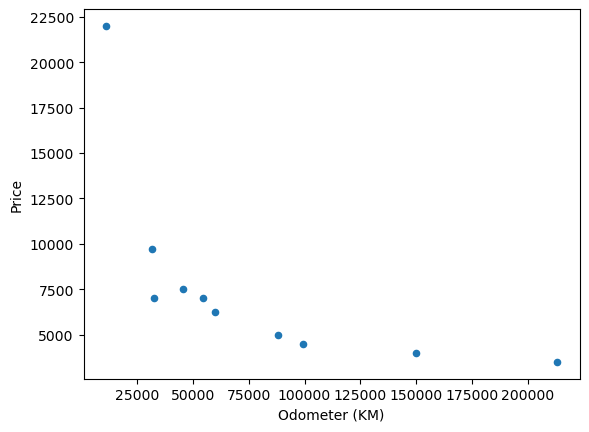

In [28]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

<Axes: >

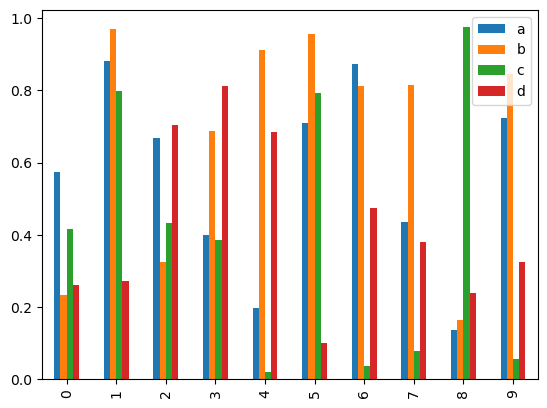

In [29]:
x = np.random.rand(10,4)
df = pd.DataFrame(x, columns=['a','b','c','d'])
df.plot.bar()

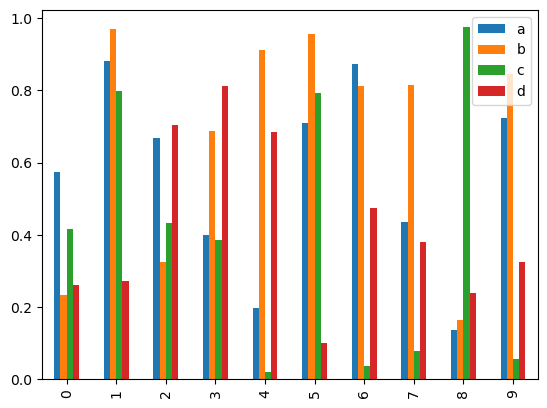

In [30]:
df.plot(kind="bar");

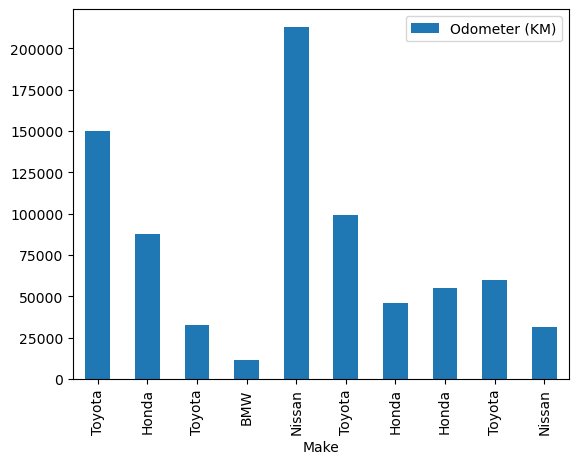

In [35]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

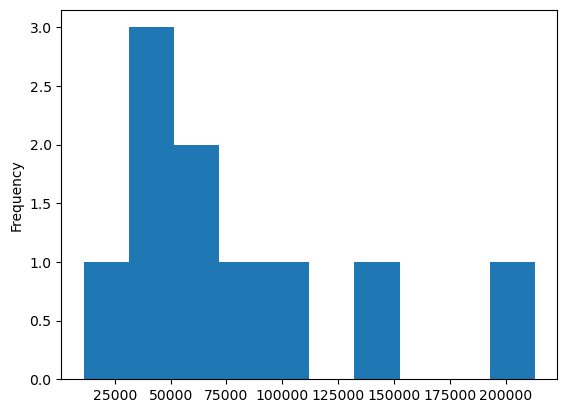

In [34]:
car_sales['Odometer (KM)'].plot.hist();

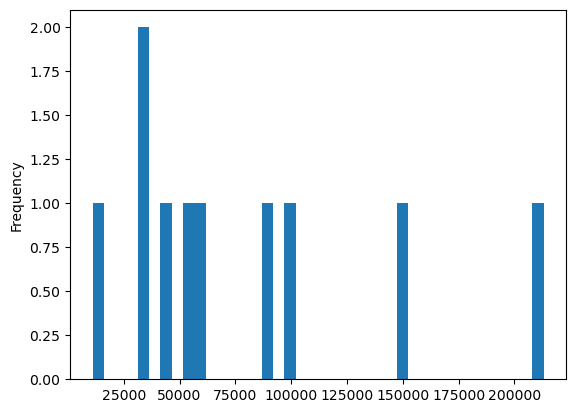

In [39]:
car_sales['Odometer (KM)'].plot.hist(bins=40);

In [41]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


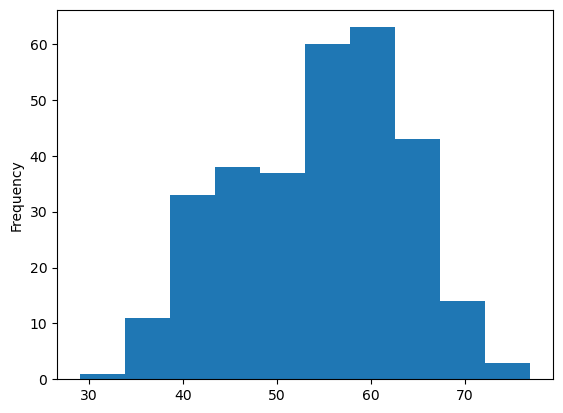

In [42]:
heart_disease['age'].plot.hist();

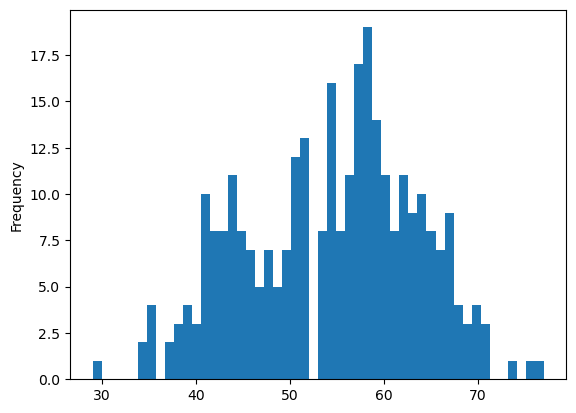

In [43]:
heart_disease['age'].plot.hist(bins=50);

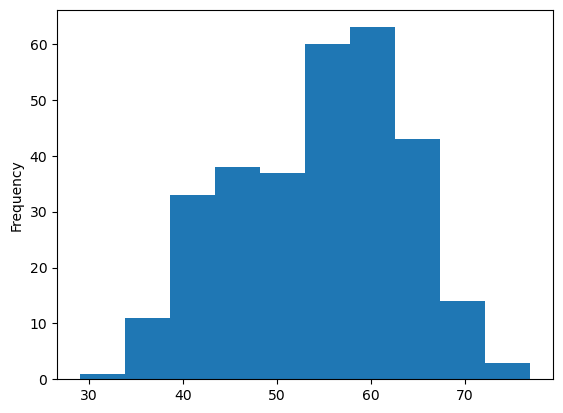

In [44]:
heart_disease['age'].plot.hist(subplots=True);

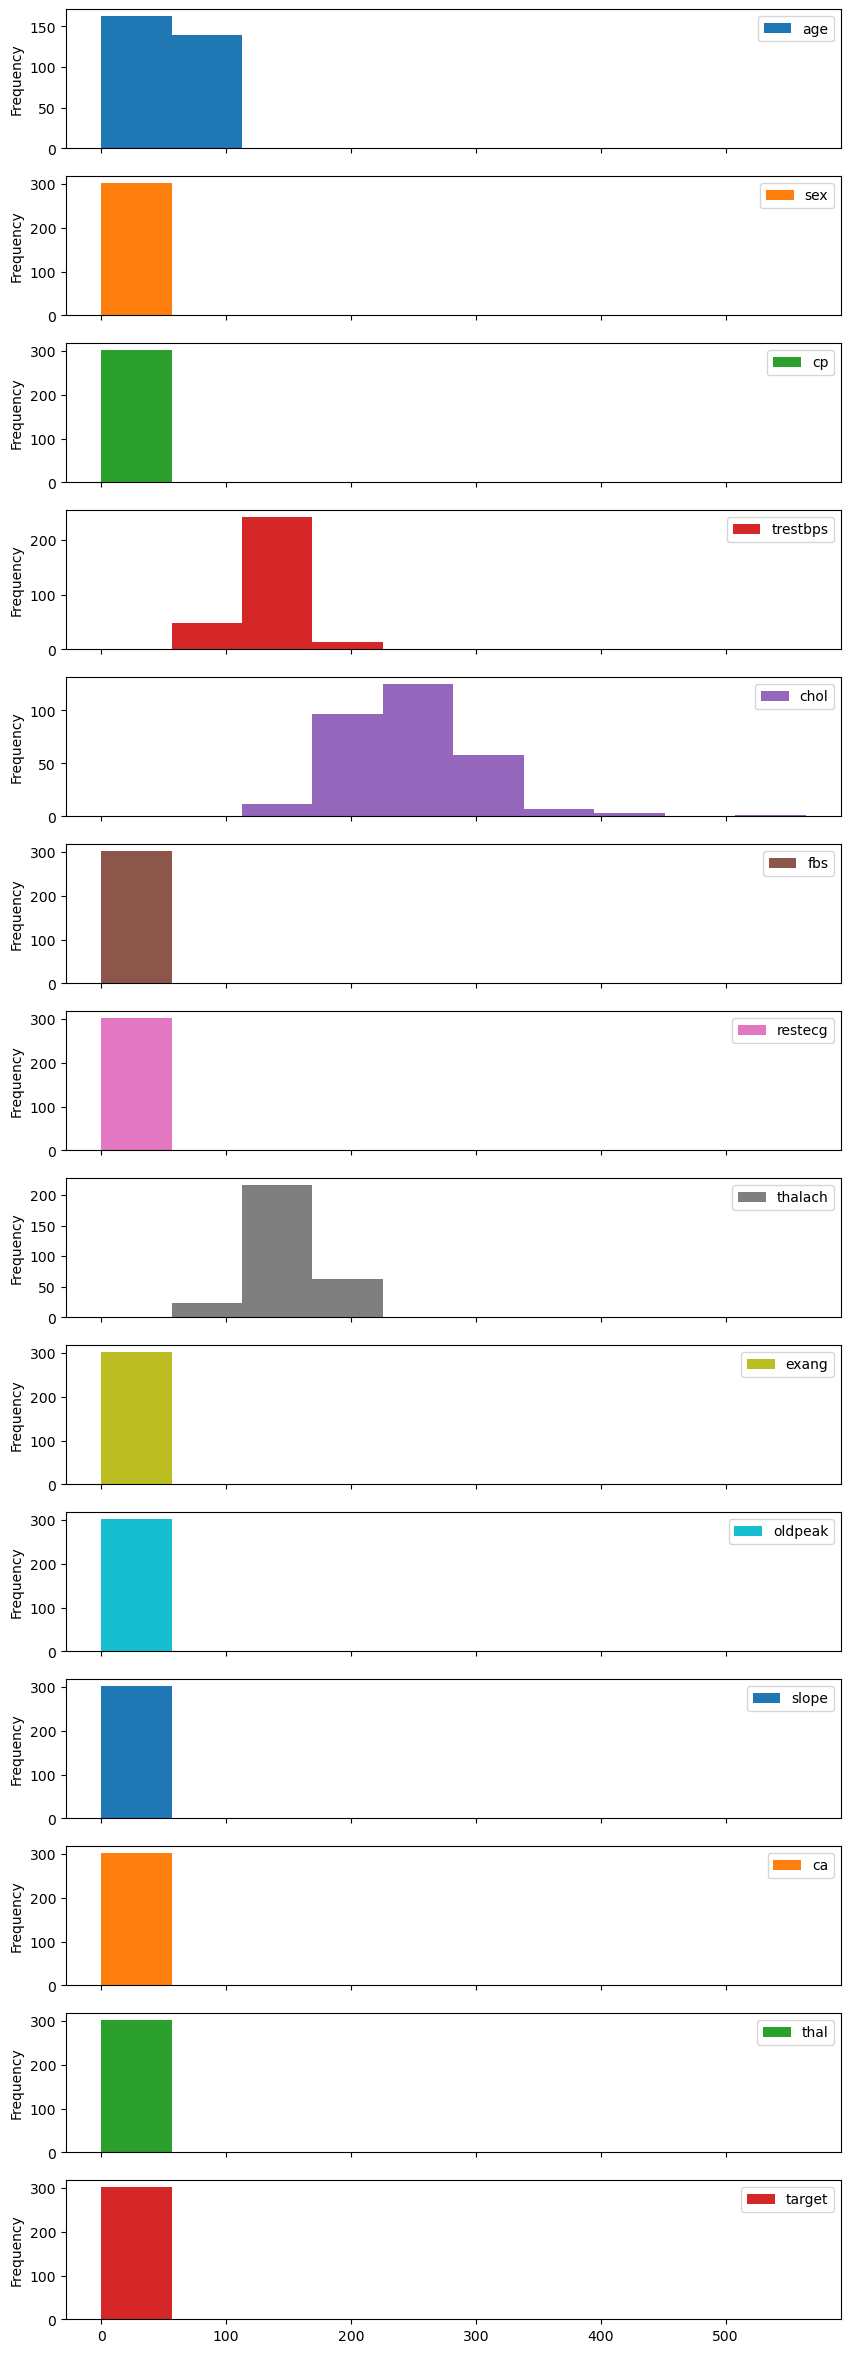

In [46]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);

In [48]:
over_50 = heart_disease[heart_disease['age'] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


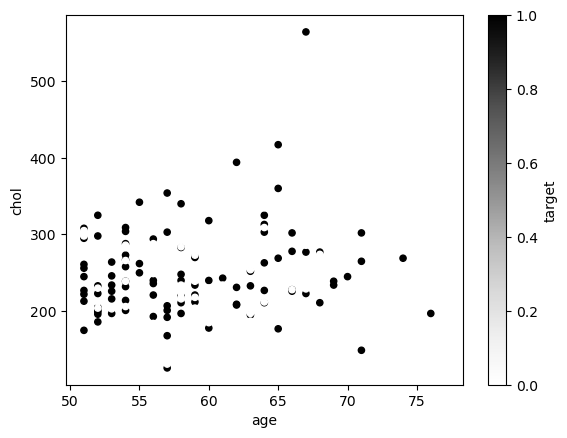

In [49]:
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target');

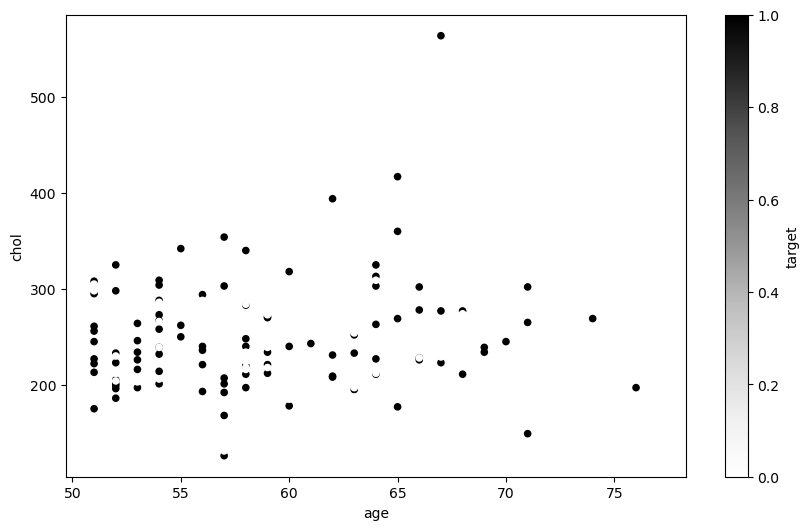

In [51]:
# OO method with pyplot
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

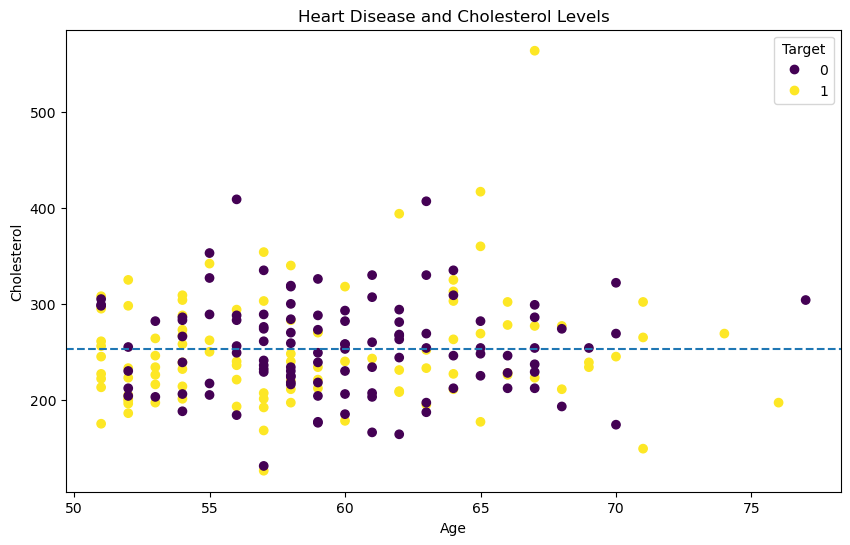

In [53]:
# OO method
fix, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(
            x=over_50['age'],
            y=over_50['chol'],
            c=over_50['target'])
ax.set(title='Heart Disease and Cholesterol Levels',
      xlabel='Age',
      ylabel='Cholesterol')
ax.legend(*scatter.legend_elements(), title='Target')
ax.axhline(over_50['chol'].mean(), linestyle='--');

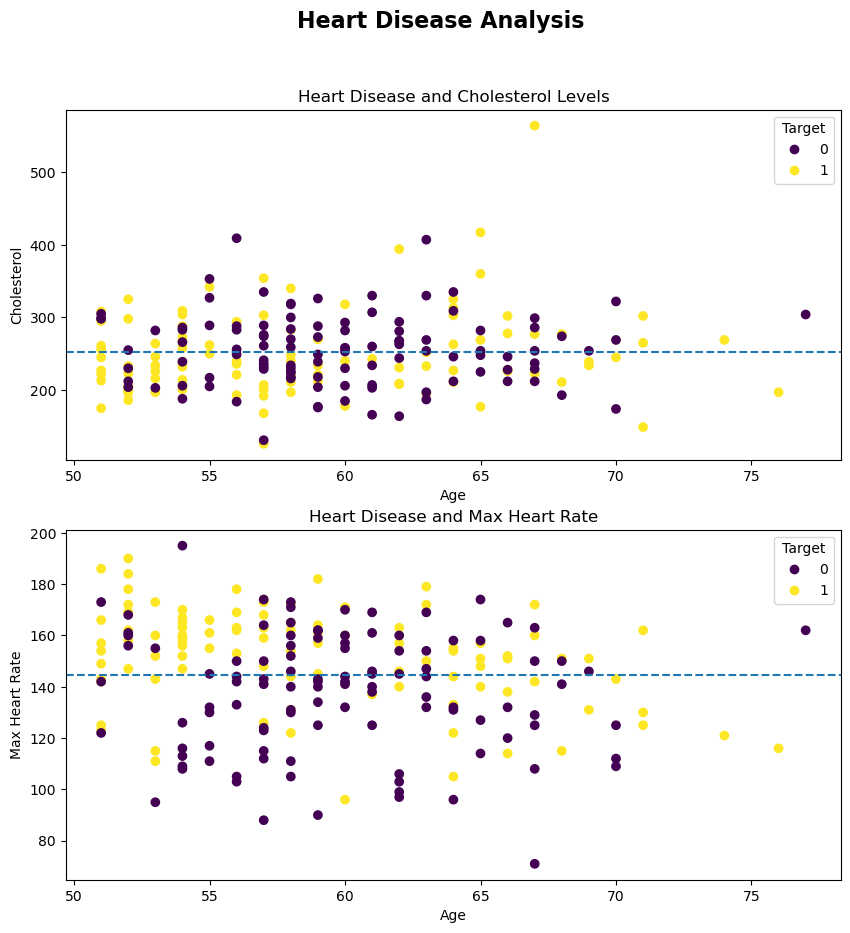

In [58]:
# subplot of chol, age,thalach

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

scatter = ax0.scatter(
            x=over_50['age'],
            y=over_50['chol'],
            c=over_50['target'])
ax0.set(title='Heart Disease and Cholesterol Levels',
      xlabel='Age',
      ylabel='Cholesterol')
ax0.legend(*scatter.legend_elements(), title='Target')
ax0.axhline(over_50['chol'].mean(), linestyle='--')

scatter = ax1.scatter(
            x=over_50['age'],
            y=over_50['thalach'],
            c=over_50['target'])
ax1.set(title='Heart Disease and Max Heart Rate',
      xlabel='Age',
      ylabel='Max Heart Rate')
ax1.legend(*scatter.legend_elements(), title='Target')
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

fig.suptitle('Heart Disease Analysis',
            fontsize=16,
            fontweight='bold');

## Customize your plots

In [59]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

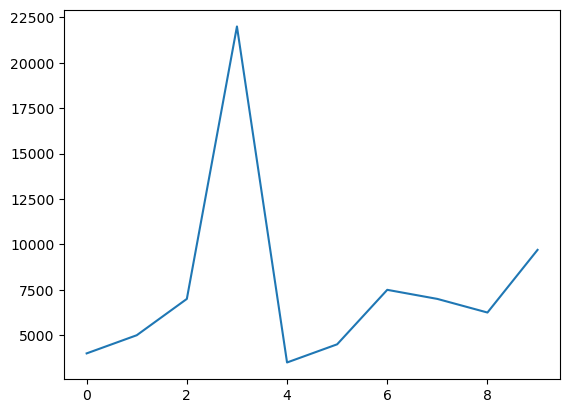

In [60]:
car_sales['Price'].plot();

In [70]:
plt.style.use('seaborn-v0_8-darkgrid');


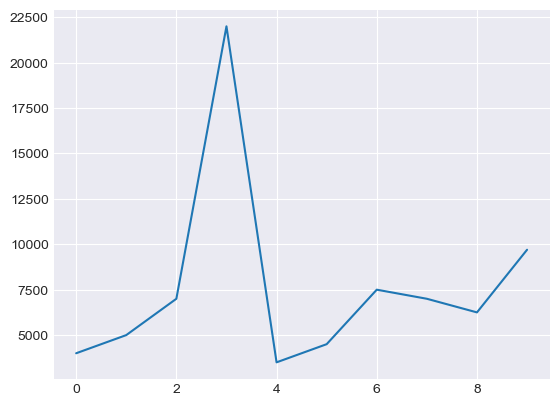

In [72]:
car_sales['Price'].plot()
plt.show()

In [75]:
plt.style.use('seaborn-v0_8-pastel');

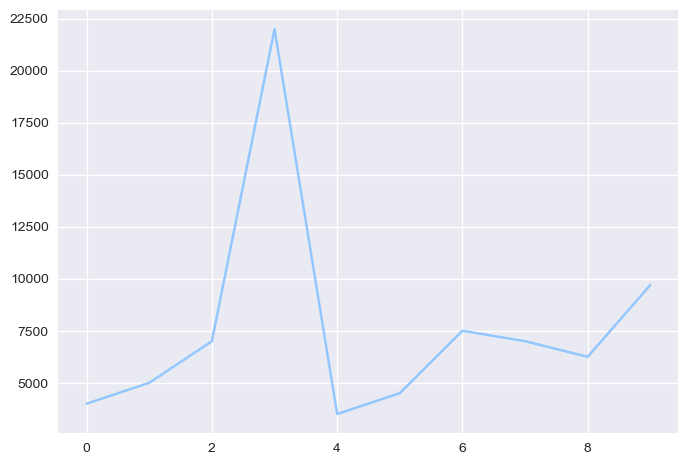

In [76]:
car_sales['Price'].plot();

In [77]:
x = np.random.randn(10,4)
x

array([[-0.35274412, -0.87566077,  0.72022425,  0.24187559],
       [-0.38294622, -1.28149078, -0.12799387, -0.99205173],
       [ 0.70816466, -1.0320985 ,  0.90068873, -0.28975602],
       [-0.47826643,  0.216188  , -1.13354616,  1.35742957],
       [-0.10371318,  1.08670309,  0.46247852, -2.68398525],
       [-2.90052455, -1.63207801, -1.12555832,  1.26081505],
       [-0.54547651, -0.00292927,  1.91294984, -1.0390237 ],
       [ 1.15305937,  1.12197886,  0.03023118,  0.61405589],
       [-1.54486363,  0.88501019,  0.55818689, -1.79845016],
       [ 0.45707553, -1.08051473, -1.74439468,  2.22750139]])

In [78]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,-0.352744,-0.875661,0.720224,0.241876
1,-0.382946,-1.281491,-0.127994,-0.992052
2,0.708165,-1.032099,0.900689,-0.289756
3,-0.478266,0.216188,-1.133546,1.357430
4,-0.103713,1.086703,0.462479,-2.683985
5,-2.900525,-1.632078,-1.125558,1.260815
6,-0.545477,-0.002929,1.912950,-1.039024
7,1.153059,1.121979,0.030231,0.614056
8,-1.544864,0.885010,0.558187,-1.798450
9,0.457076,-1.080515,-1.744395,2.227501


matplotlib.axes._axes.Axes

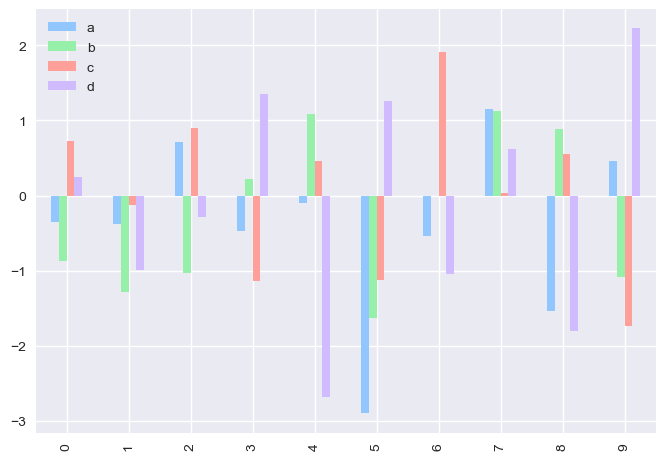

In [79]:
ax = df.plot(kind='bar')
type(ax)

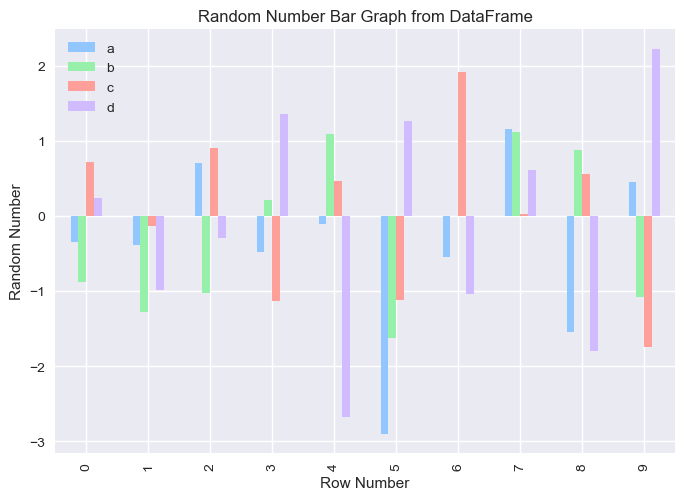

In [83]:
ax = df.plot(kind='bar')
ax.set(title='Random Number Bar Graph from DataFrame',
      xlabel='Row Number',
      ylabel='Random Number')
ax.legend().set_visible(True);

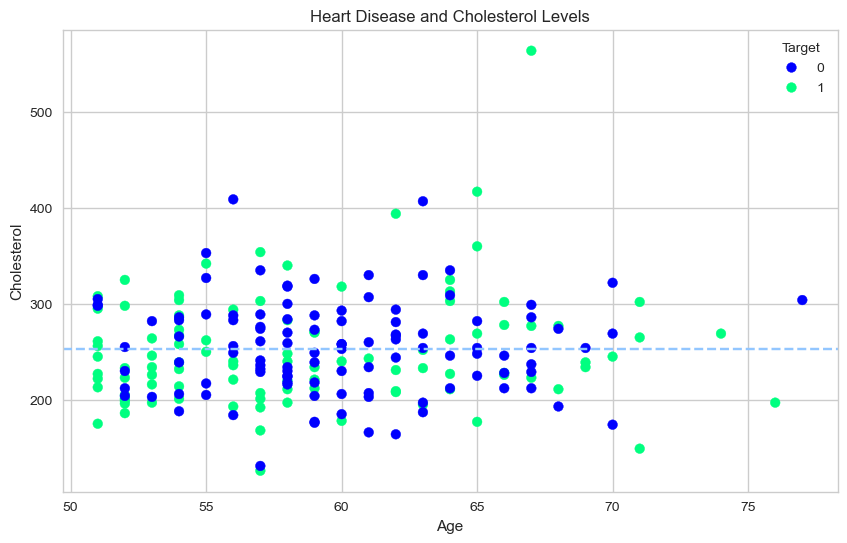

In [84]:
plt.style.use('seaborn-v0_8-whitegrid');

fix, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(
            x=over_50['age'],
            y=over_50['chol'],
            c=over_50['target'],
            cmap="winter") # this changes the colour cheme
ax.set(title='Heart Disease and Cholesterol Levels',
      xlabel='Age',
      ylabel='Cholesterol')
ax.legend(*scatter.legend_elements(), title='Target')
ax.axhline(over_50['chol'].mean(), linestyle='--');

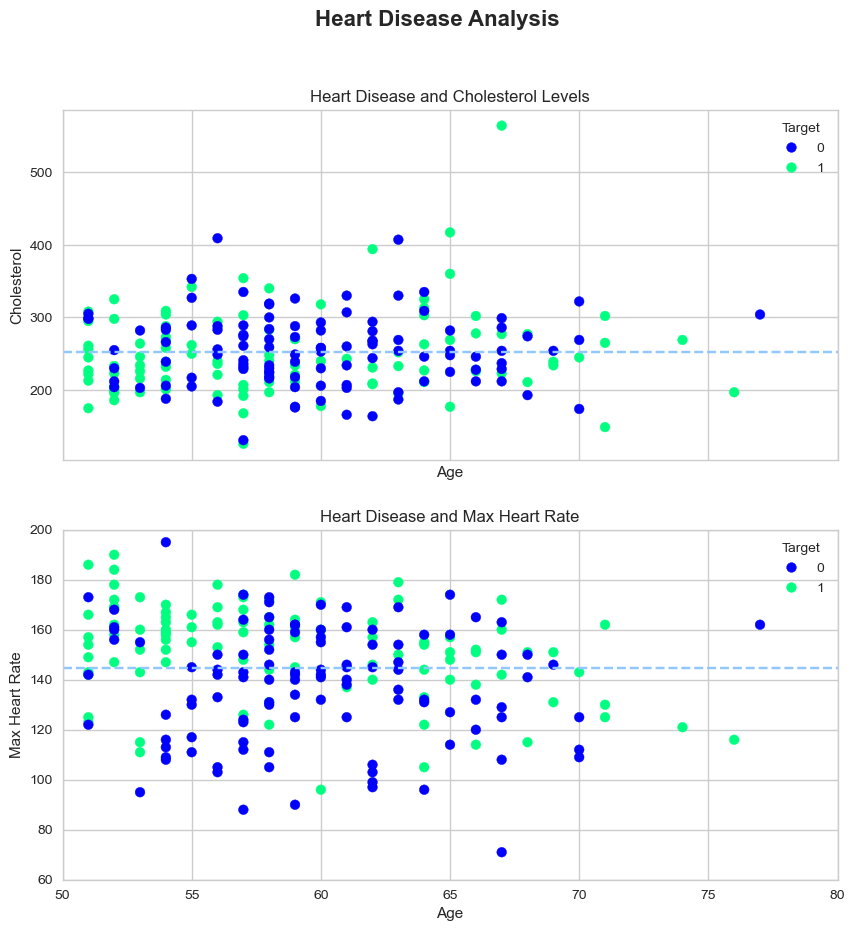

In [91]:
plt.style.use('seaborn-v0_8-whitegrid');

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

#add data to ax0
scatter = ax0.scatter(
            x=over_50['age'],
            y=over_50['chol'],
            c=over_50['target'],
            cmap="winter")

# customize ax0
ax0.set(title='Heart Disease and Cholesterol Levels',
      xlabel='Age',
      ylabel='Cholesterol')

# change the x-axis limits
ax0.set_xlim([50,80])

# add a legend to ax0
ax0.legend(*scatter.legend_elements(), title='Target')

# add a mean line
ax0.axhline(over_50['chol'].mean(), linestyle='--')

#add data to ax1
scatter = ax1.scatter(
            x=over_50['age'],
            y=over_50['thalach'],
            c=over_50['target'],
            cmap="winter")

# customize ax1
ax1.set(title='Heart Disease and Max Heart Rate',
      xlabel='Age',
      ylabel='Max Heart Rate')

# change the x-axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# add a legend to ax0
ax1.legend(*scatter.legend_elements(), title='Target')

# add a mean line
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# add a title to the figure
fig.suptitle('Heart Disease Analysis',
            fontsize=16,
            fontweight='bold');